In [1]:
#Multiple Linear Regression
"""
y = b0 + b1*x1 + b2*x2 + ... + bn*xn
"""

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
dataset = pd.read_csv('mydata/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dataset.shape

(50, 5)

In [5]:
#sns.pairplot(dataset)

In [6]:
dataset = dataset.drop('State', axis = True)

In [7]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


<AxesSubplot:>

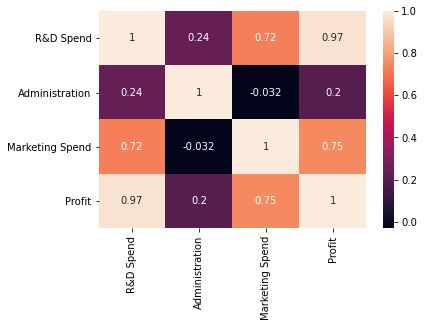

In [8]:
corr = dataset.corr()
sns.heatmap(corr, annot = True)

In [9]:
X = dataset.drop('Profit', axis = True)
y = dataset['Profit']

In [10]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [11]:
#Standardizasyon

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [14]:
X

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01],
       [ 4.43259872e-01,  2.15449064e-01,  3.20617441e-01],
       [ 4.02077603e-01,  5.10178953e-01,  3.43956788e-01],
       [ 1.01718075e+00,  1.26919939e+00,  3.75742273e-01],
       [ 8.97913123e-01,  4.58678535e-02,  4.19218702e-01],
       [ 9.44411957e-02,  9.11841968e-03

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
#Model inşası (build)

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = regressor.predict(X_test).round(1)

In [19]:
hesaplama = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Original Salary', 'Predicted Salary'])
hesaplama.head(5)

,Original Salary,Predicted Salary
0,103282.38,103901.9
1,144259.40,132763.1
2,146121.95,133567.9
3,77798.83,72911.8
4,191050.39,179627.9


In [20]:
print("Training Accuracy :", regressor.score(X_train, y_train))
print("Testing Accuracy :", regressor.score(X_test, y_test))

Training Accuracy : 0.9499572530324031
Testing Accuracy : 0.9393955917820571


In [21]:
#Modeli test etme

In [22]:
regressor.intercept_

111297.71256204927

In [24]:
regressor.coef_

array([35391.2501208 ,   815.21987542,  4202.06618916])

In [25]:
feature = [165349.20, 136897.80, 471784.10]
scale_feature = sc.transform([feature])
scale_feature

array([[2.01641149, 0.56075291, 2.15394309]])

In [26]:
y_pred_test = regressor.predict(scale_feature)
y_pred_test

array([192169.18440985])

In [27]:
#35391*2.01 + 815*0.56 + 4202*2.15 + 111297 = ????

In [28]:
#Sınıflandırma (Classification)

In [29]:
#Logistic Regression, sigmoid fonksiyonu kullanır. Türevi alınması kolaydır (Gradient Descent'da işe yarar)
#Modelimize non-linear'lik katar. 

In [30]:
dataset = pd.read_csv('mydata/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [31]:
X = dataset.drop(['Purchased', 'User ID', 'Gender'], axis = 1)
y = dataset['Purchased']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 1.0)
classifier.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
hesaplama = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Original Purchased', 'Predicted Purchased'])
hesaplama

,Original Purchased,Predicted Purchased
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,0
98,1,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


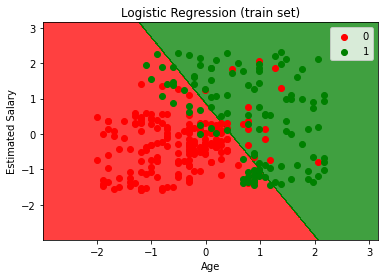

In [37]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


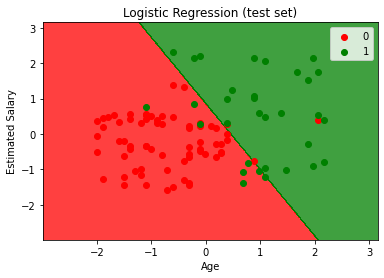

In [38]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [39]:
#confusion matrix

In [ ]:
#accuracy (başarım) = (TN + TP) / (TN + FP + TN + FN)

In [ ]:
#precision (kesinlik) = TP / (TP + FP)

In [ ]:
#recall or sensitivity (geri çağırma veya hassasiyet) = TP / (FN + TP)

In [ ]:
#specificity (özellik) = TN / (TN + FP)

In [40]:
#f1-score = 2 * (precision * recall) / (precision + recall), dengeli dağılmayan sınıflarda kullanılır

In [41]:
#K-En Yakın Komşu Algoritması (K-Nearest Neighbor)

In [ ]:
#Elbow (Dirsek) Metodu ile orjinal K değerini hesaplarız.

In [ ]:
#Mesafeler -> Euclidean, Manhattan (|x1 - x2| + |y1 -y2|), Minkowski , Hamming